In [17]:
import tensorflow as tf
import numpy as np 
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
data = open(r'C:\Users\nico_\Desktop\Coursera\Tensorflow\NLP\paroles.txt').read()

In [19]:
# Split the long string per line and put in a list
corpus = data.lower().split("\n")

# Preview the result
print(corpus)

['come all ye maidens young and fair', 'and you that are blooming in your prime', 'always beware and keep your garden fair', 'let no man steal away your thyme', 'for thyme it is a precious thing', 'and thyme brings all things to my mind', 'nlyme with all its flavours, along with all its joys', 'thyme, brings all things to my mind', 'once i and a bunch of thyme', 'i thought it never would decay', 'then came a lusty sailor', 'who chanced to pass my way', 'and stole my bunch of thyme away', 'the sailor gave to me a rose', 'a rose that never would decay', 'he gave it to me to keep me reminded', 'of when he stole my thyme away', 'sleep, my child, and peace attend thee', 'all through the night', 'guardian angels god will send thee', 'soft the drowsy hours are creeping', 'hill and dale in slumber sleeping', 'i my loving vigil keeping', 'while the moon her watch is keeping', 'while the weary world is sleeping', 'oer thy spirit gently stealing', 'visions of delight revealing', 'breathes a pure 

In [20]:
# Initialize the Tokenizer class
tokenizer = Tokenizer()

# Generate the word index dictionary
tokenizer.fit_on_texts(corpus)

# Define the total words. You add 1 for the index `0` which is just the padding token
total_words = len(tokenizer.word_index) + 1

print(f'word index dictionary: {tokenizer.word_index}')
print(f'total words: {total_words}')

word index dictionary: {'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'thro

In [21]:
# Initialize the sequences list
input_sequences = []

# Loop over every line
for line in corpus:

    # Tokenize the current line
    token_list = tokenizer.texts_to_sequences([line])[0]

    # Loop over the line several times to generate the subphrases
    for i in range(1, len(token_list)):

        # Generate the subphrase
        n_gram_sequence = token_list[:i+1]

        # Append the subphrase to the sequences list
        input_sequences.append(n_gram_sequence)

# Get the length of the longest line
max_sequence_len = max([len(x) for x in input_sequences])

# Pad all sequences
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create inputs and label by splitting the last token in the subphrases
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

# Convert the label into one-hot arrays
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [22]:
# Get sample sentence
sentence = corpus[0].split()
print(f'sample sentence: {sentence}')

# Initialize token list
token_list = []

# Look up the indices of each word and append to the list
for word in sentence: 
  token_list.append(tokenizer.word_index[word])

# Print the token list
print(token_list)

sample sentence: ['come', 'all', 'ye', 'maidens', 'young', 'and', 'fair']
[51, 12, 96, 1217, 48, 2, 69]


In [23]:
# Pick element
elem_number = 6

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')

token list: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
decoded to text: ['and']


In [24]:
# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

one-hot label: [0. 0. 0. ... 0. 0. 0.]
index of label: 11


In [25]:
# Pick element
elem_number = 5

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
decoded to text: ['come all ye maidens young and']
one-hot label: [0. 0. 0. ... 0. 0. 0.]
index of label: 69


In [26]:
from keras.optimizers import Adam

model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam= Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer= adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs =100, verbose =1)

Epoch 1/100
377/377 [==============================] - 24s 49ms/step - loss: 6.5867 - accuracy: 0.0784
Epoch 2/100
377/377 [==============================] - 19s 50ms/step - loss: 5.6613 - accuracy: 0.1195
Epoch 3/100
377/377 [==============================] - 19s 50ms/step - loss: 4.7517 - accuracy: 0.1723
Epoch 4/100
377/377 [==============================] - 20s 53ms/step - loss: 3.8627 - accuracy: 0.2407
Epoch 5/100
377/377 [==============================] - 20s 52ms/step - loss: 3.0355 - accuracy: 0.3469
Epoch 6/100
377/377 [==============================] - 20s 53ms/step - loss: 2.3864 - accuracy: 0.4592
Epoch 7/100
377/377 [==============================] - 23s 61ms/step - loss: 1.9260 - accuracy: 0.5505
Epoch 8/100
377/377 [==============================] - 21s 57ms/step - loss: 1.6164 - accuracy: 0.6129
Epoch 9/100
377/377 [==============================] - 23s 61ms/step - loss: 1.3972 - accuracy: 0.6606
Epoch 10/100
377/377 [==============================] - 22s 59ms/step - l

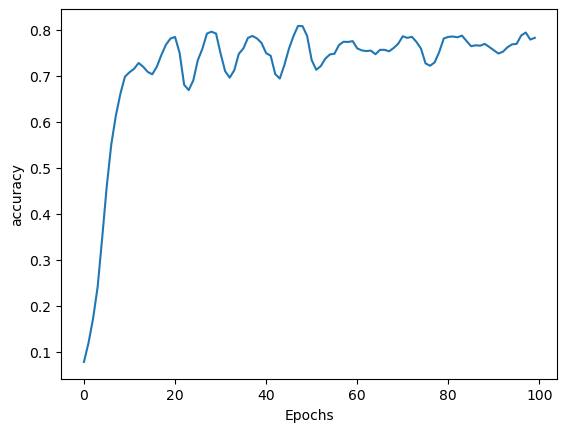

In [27]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

In [28]:
# Define seed text
seed_text = "Nicolas went to Dublin"

# Define total words to predict
next_words = 100

# Loop until desired length is reached
for _ in range(next_words):

    # Convert the seed text to a token sequence
    token_list = tokenizer.texts_to_sequences([seed_text])[0]

    # Pad the sequence
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

    # Feed to the model and get the probabilities for each index
    probabilities = model.predict(token_list)

    # Get the index with the highest probability
    predicted = np.argmax(probabilities, axis=-1)[0]

    # Ignore if index is 0 because that is just the padding.
    if predicted != 0:

        # Look up the word associated with the index. 
        output_word = tokenizer.index_word[predicted]

        # Combine with the seed text
        seed_text += " " + output_word

# Print the result	
print(seed_text)

1/1 [==============================] - 0s 34ms/step
Nicolas went to Dublin my darling from the sweet voice of the lived of lough leane revealing boo young dying white feet turning grey but volunteers were saying no free invitation in erin go bragh go bragh oer the creole girl for love love love his love be reflections love love me or else ill expire my gone gone gone alas fade away gone gone away now like the room for many gone oer magee by the river flow gently along the sea may be rough shed sweetest never would decay love now alone that gone says i love a sigh and bade goodbye


In [29]:
# Define seed text
seed_text = "Nicolas  went to Dublin"

# Define total words to predict
next_words = 100

# Loop until desired length is reached
for _ in range(next_words):
    # Convert the seed text to a token sequence
  token_list = tokenizer.texts_to_sequences([seed_text])[0]

    # Pad the sequence
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    
    # Feed to the model and get the probabilities for each index
  probabilities = model.predict(token_list)

  # Pick a random number from [1,2,3]
  choice = np.random.choice([1,2,3])

  # Sort the probabilities in ascending order 
  # and get the random choice from the end of the array
  predicted = np.argsort(probabilities)[0][-choice]

    # Ignore if index is 0 because that is just the padding.
  if predicted != 0:

        # Look up the word associated with the index. 
      output_word = tokenizer.index_word[predicted]

        # Combine with the seed text
      seed_text += " " + output_word

# Print the result	
print(seed_text)

1/1 [==============================] - 0s 25ms/step
Nicolas  went to Dublin whack the mountain side were first bonnie spent you the same stood has dressed gone away oer the liffey from his comrades a prison long are encumbered kept hoping in this town in their town each plying now above slung guineas down thats guns now hes he love me prison listen shed them woods out meaning to know sing or fathers tears is whisperings than around through grass alas feeling me my love art son laughd thou pretty bough free say me city where can sit ye home ago in the closet along must ten thousand love was to find
